# Diagnostic analytics &ndash; Best practices

In this article, it is assumed that the contents of the notebook https://nbviewer.org/github/juhanurmonen/data-analytics-basics-descriptive-analytics/blob/main/Descriptive_analytics_Best_practices.ipynb
are familiar to the reader.

Techniques used:

- categorical variables &rightarrow; __cross-tabulation__
- categorical and quantitative variable &rightarrow; __classification__ of the quantitative variable followed by __cross-tabulation__
- categorical and quantitative variable &rightarrow; __statistical key figures__ in the groups determined by the categorical variable
- quantitative variables &rightarrow; __scatter chart__ and __correlation coefficient__

In this note, the following functions are used for calculation:

- __crosstab__ cross-tabulation
- __cut__ classification of a quantitative variable
- __groupby__ grouping
- __describe__ calculation of statistical key figures
- __dropna__ omit rows containing missing values
- __corr__ calculate the correlation coefficient

This notebook uses the following functions to create charts:

- __plot.bar__ column chart
- __plot.barh__ bar chart
- __histplot__ histogram of the Seaborn library presenting a classified distribution
- __barplot__ bar chart from the Seaborn library, which by default shows means
- __boxplot__ boxplot of the Seaborn library presenting a summary of statistical key figures
- __scatterplot__ scatter chart of the Seaborn library
- __jointplot__ scatter chart of the Seaborn library with laced edge distributions

- __heatmap__ color map of the Seaborn library for visualization of correlations
- __pairplot__ collection of multiple scatter charts from the Seaborn library

- __displot__ collection of multiple charts from the Seaborn library (histplot)
- __catplot__ collection of multiple charts from the Seaborn library (countplot, barplot, boxplot)
- __relplot__ collection of multiple charts from the Seaborn library (scatterplot)

Statistical significance testing is used to test whether the difference or dependency observed in the sample is statistically significant, i.e. whether it can be generalized from the sample to a wider population from which the sample was taken. The following functions are used for statistical significance testing:

- __chi2_contingency__ chi-squared test for cross-tabulation testing
- __ttest_ind__ independent samples t-test to compare the means of two groups
- __f_oneway__ F-test for comparing the means of several groups
- __pearsonr__ testing the correlation coefficient

Several articles and books have been written on the concept of statistical significance. More information about it can also be found online. Here is a link to a Wikipedia article about p-value: https://en.wikipedia.org/wiki/P-value

## Preliminaries

In [1]:
### Import basic libraries

import pandas as pd

### Import libraries for graphics

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

### Import libraries for significance testing
from scipy.stats import chi2_contingency, ttest_ind, f_oneway, pearsonr

### Formatting the percentage axis of charts
from matplotlib.ticker import PercentFormatter
ticks = PercentFormatter(xmax = 100, decimals = 0, symbol = ' %')

In [2]:
### Read the data and create some preliminary lists etc.

df = pd.read_excel('https://myy.haaga-helia.fi/~menetelmat/Data-analytiikka/Teaching/data1_en.xlsx')

### Textual values of variables

gender = ['Men', 'Women']

education = ['Comprehensive school', 'Secondary level', 'University degree', 'Master degree']

satisfaction = ['very unsatisfied', 'unsatisfied', 'no opinion', 'satisfied', 'very satisfied']

### Class boundaries for age classification

age_groups = [19, 29, 39, 49, 59, 69]

df

,number,sex,age,family,education,empl_years,salary,management,colleagues,environment,salary_level,duties,occu_health,timeshare,gym,massage
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78,1,22,1,3.0,0.0,1598,4,4.0,4,3,4,NaN,1.0,1.0,NaN
78,79,1,33,1,1.0,2.0,1638,1,3.0,2,1,2,1.0,NaN,NaN,NaN
79,80,1,27,1,2.0,7.0,2612,3,4.0,3,3,3,1.0,NaN,1.0,NaN
80,81,1,35,2,2.0,16.0,2808,3,4.0,3,3,3,NaN,NaN,NaN,NaN


## Cross-tabulation (categorical variables)

First, let's do cross-tabulation in numbers.

In [3]:
### Cross-tabulation of variables satisfaction with management and sex.

df1 = pd.crosstab(df['management'], df['sex'])

### Polishing 

df1.index = satisfaction

df1.index.name = 'satisfaction with the management'

df1.columns = gender

df1

,Men,Women
satisfaction with the management,,
very unsatisfied,7,0
unsatisfied,15,1
no opinion,23,7
satisfied,15,8
very satisfied,3,3


In [4]:
### Let's add add the row for totals.

df1_n = df1

df1_n.loc['n'] = df1.sum()

df1_n

,Men,Women
satisfaction with the management,,
very unsatisfied,7,0
unsatisfied,15,1
no opinion,23,7
satisfied,15,8
very satisfied,3,3
n,63,19


## Chi-squared test

Chi-squared test on Wikipedia: https://en.wikipedia.org/wiki/Chi-squared_test

Chi-squared test on SciPy.org: https://docs.scipy.org/doc//scipy-1.2.1/reference/generated/scipy.stats.chi2_contingency.html

Note that the chi-squared test is always calculated from the number table, not from percentages.

In [5]:
### Chi-squared test for the dataframe df1

chi2_contingency(df1)

(8.853002675771554,
 0.11507299935223848,
 5,
 array([[ 5.37804878,  1.62195122],
        [12.29268293,  3.70731707],
        [23.04878049,  6.95121951],
        [17.67073171,  5.32926829],
        [ 4.6097561 ,  1.3902439 ],
        [63.        , 19.        ]]))

It is particularly important in these reviews to be able to interpret the results of the functions.

The p-value of the above chi-square test is 0.115 (11.5%), which exceeds 0.05 (5%). So the dependence is not significant. Especially in this case, gender does not matter when looking at satisfaction with management.

Next, cross-tabulation as column chart. Remember to leave a total row out of the chart.

Text(0, 0.5, 'number of responses')

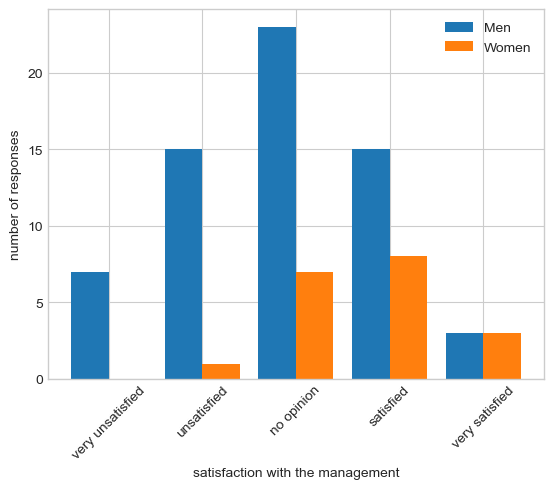

In [6]:
### with the drop function, the total row is dropped before drawing up the chart

df1_n.drop('n').plot.bar(width=0.8, rot=45)

### Vertical axis label

plt.ylabel('number of responses')

In the following we create cross-tabulation in percentages &ndash; think carefully if you want percentages of column sums or row sums!

In [7]:
### Cross-tabulation of satisfaction with management and gender

df2 = pd.crosstab(df['management'], df['sex'], normalize='columns') * 100

### Polishing the table

df2.index = satisfaction

df2.index.name = 'Satisfaction with management'

df2.columns = gender

### Number formatting

df2.style.format('{:.1f} %').background_gradient(cmap='Reds')

,Men,Women
Satisfaction with management,,
very unsatisfied,11.1 %,0.0 %
unsatisfied,23.8 %,5.3 %
no opinion,36.5 %,36.8 %
satisfied,23.8 %,42.1 %
very satisfied,4.8 %,15.8 %


Choosing colormaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html

Let's plot the previous table as 100% stacked horizontal bars.

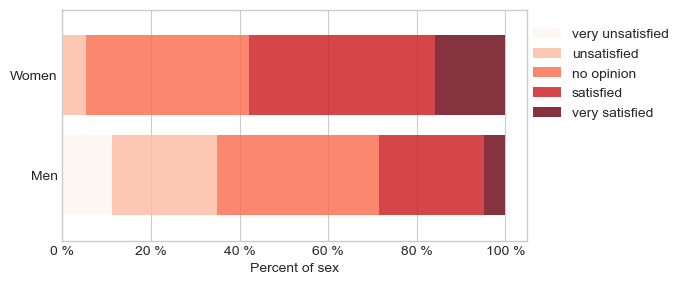

In [8]:
### 100% stacked horizontal bars

### T swaps the rows and columns of the table (value series and categories of the chart)

### With the parameter alpha, a slight transparency to the colors is obtained.

df2.T.plot.barh(stacked=True, width=0.8, cmap='Reds', alpha=0.8, figsize=(6, 3))

### Labels and housekeeping

plt.xlabel('Percent of sex')

plt.grid(axis='y')

### x-axis percentage formatting

plt.gca().xaxis.set_major_formatter(ticks)

### Placing the legend

plt.legend(loc=(1, 0.5))

Entities of several charts can be obtained by seaborn's catplot function (countplot). Fine-tuning the entities of several charts requires some familiarity with the matter.

The value __count__ of the parameter kind refers to the countplot chart type.

The __height__ and __aspect__ parameters are used to determine the size of a catplot as in other composite charts (try different values).

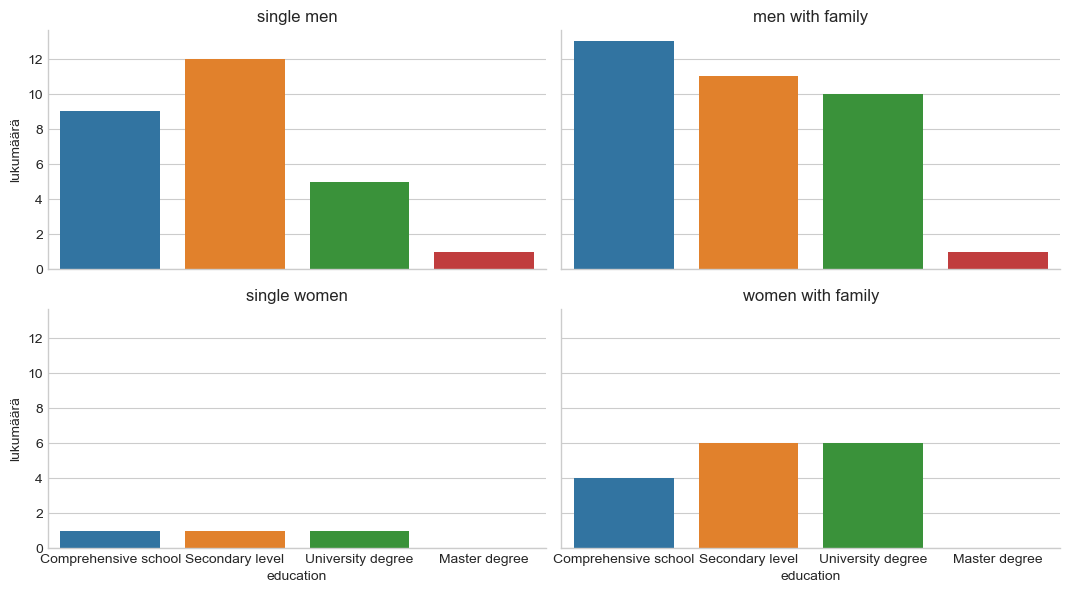

In [9]:
### Distribution of education by gender and family relationship.

g = sns.catplot(x='education', col='family', row='sex', data=df, kind='count', height=3, aspect=1.8)

### Tuning

g.set_xticklabels(education)

g.set_ylabels('lukumäärä')

### Next define the chart titles.

titles = ['single men','men with family', 'single women', 'women with family']
for ax, title in zip(g.axes.flatten(), titles):
    ax.set_title(title)


## Cross-tabulation (categorical and quantitative variable)

Before cross-tabulation, the quantitative variable must be classified.

In [10]:
### Classification of age

### Create a new column for age age groups

df['age_group'] = pd.cut(df['age'], bins=age_groups, right=False)

### read the result into a new dataframe and tune the table

df3 = pd.crosstab(df['age_group'], df['sex'])

df3.columns = gender

df3

,Men,Women
age_group,,
"[19, 29)",13,1
"[29, 39)",24,6
"[39, 49)",17,8
"[49, 59)",7,4
"[59, 69)",2,0


Entities of several charts can be obtained with seaborn's __displot__ functions (histplot). Fine-tuning the entities of several charts requires some familiarity with the matter.

The value __hist__ of the parameter kind means the histplot chart type.

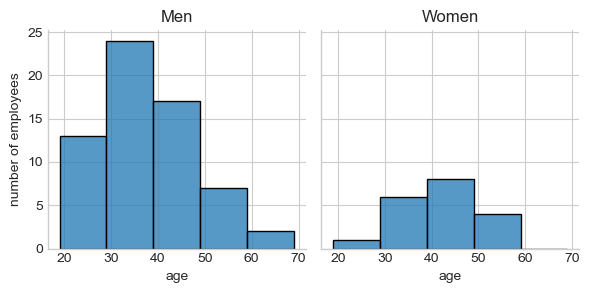

In [11]:
### Age distribution by the variable sex

g = sns.displot(x = 'age', col = 'sex', data = df, kind = 'hist', bins = age_groups, height=3, aspect=1)

### Vertical axis label

g.set_ylabels('number of employees')

### Let's take the chart titles from the list gender

for ax, title in zip(g.axes.flatten(), gender):
    ax.set_title(title)

## Statistical key figures (categorical and quantitative variable)

In [12]:
### Salary key figures according to education

df4 = df.groupby('education')['salary'].describe()

### Tuning the table and number formats

df4.index = education

df4.style.format('{:.0f}') 

,count,mean,std,min,25%,50%,75%,max
Comprehensive school,27,2310,473,1638,2008,2144,2534,3587
Secondary level,30,2403,534,1521,2008,2378,2729,3510
University degree,22,2887,1108,1559,2222,2710,2925,6278
Master degree,2,5147,110,5069,5108,5147,5186,5225


([<matplotlib.axis.XTick at 0x205901ba340>,
 [Text(0, 0, 'Comprehensive school'),
  Text(1, 0, 'Secondary level'),
  Text(2, 0, 'University degree'),
  Text(3, 0, 'Master degree')])

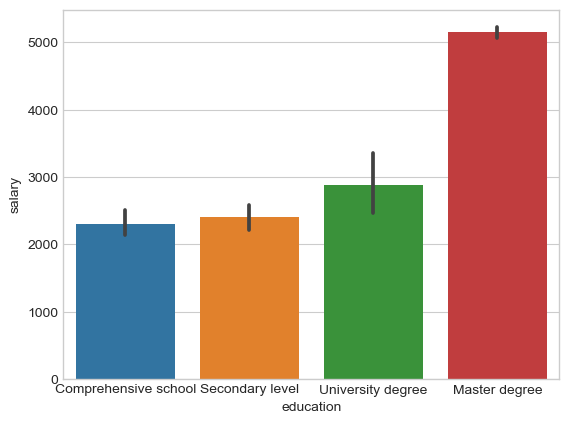

In [13]:
### Salary averages by education; margins of error included (black line)

sns.barplot(x = 'education', y = 'salary', data = df)

### for the x-axis, the textual values of the education

plt.xticks(ticks = [0, 1, 2, 3], labels = education)

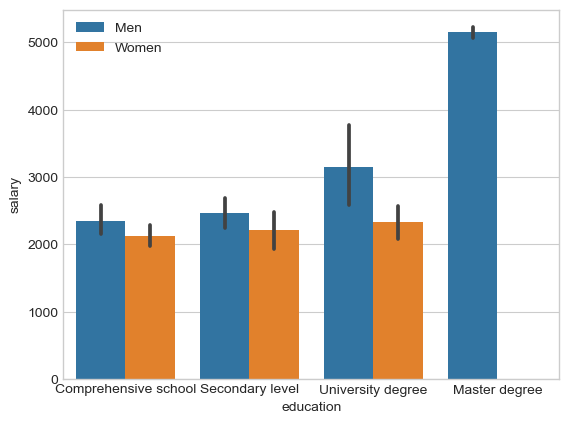

In [14]:
### Salary means by education and sex

ax = sns.barplot(x = 'education', y = 'salary', hue = 'sex', data = df)

### for the x-axis, the textual values of the education

plt.xticks(ticks = [0, 1, 2, 3], labels = education)

### Names in text form in the legend

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, gender)

([<matplotlib.axis.XTick at 0x205969a76a0>,
 [Text(0, 0, 'Comprehensive school'),
  Text(1, 0, 'Secondary level'),
  Text(2, 0, 'University degree'),
  Text(3, 0, 'Master degree')])

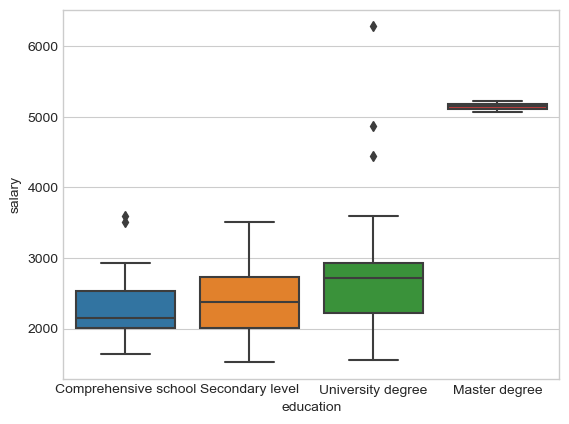

In [15]:
### Salary by education as a boxplot chart

sns.boxplot(x = 'education', y = 'salary', data = df)

### for the x-axis, the textual values of the education

plt.xticks(ticks = [0, 1, 2, 3], labels = education)

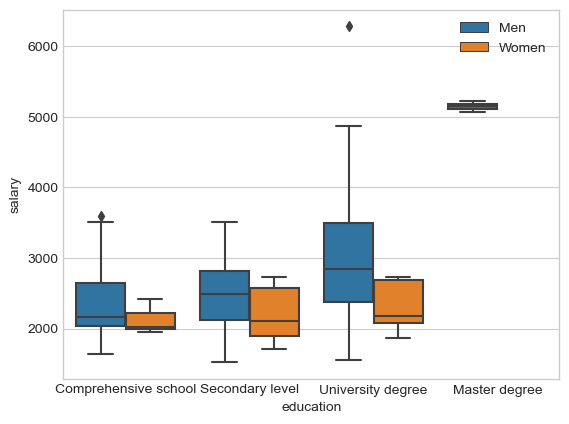

In [16]:
### Salary by education and sex

ax = sns.boxplot(x = 'education', y = 'salary', hue = 'sex', data = df)

### for the x-axis, the textual values of the education

plt.xticks(ticks = [0, 1, 2, 3], labels = education)

handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, gender)

Entities of several charts can be obtained with seaborn's __catplot__ function (barplot, boxplot).

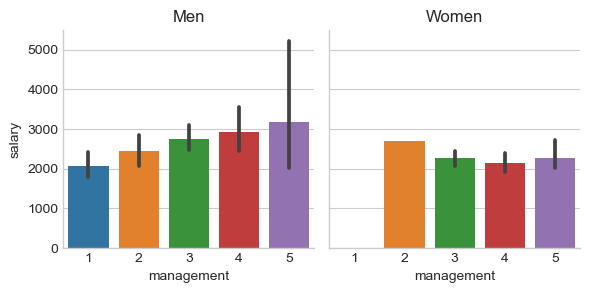

In [17]:
### Satisfaction with management by sex

g = sns.catplot(x = 'management', y = 'salary', col = 'sex', data = df, kind = 'bar', height = 3, aspect = 1)

### for the x-axis, the textual values of the gender

for ax, title in zip(g.axes.flatten(), gender):
    ax.set_title(title)

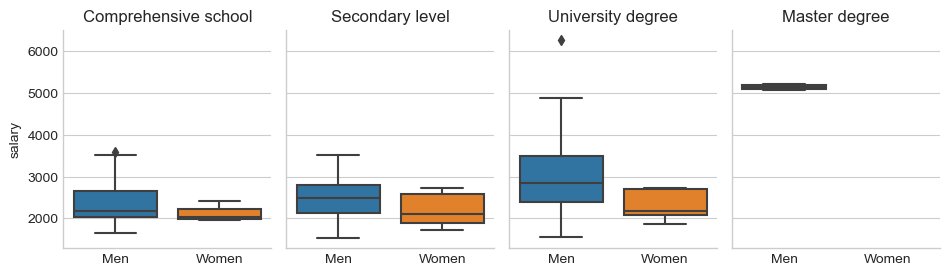

In [18]:
### Salary by sex and education

g = sns.catplot(x = 'sex', y = 'salary', col = 'education', data = df, kind = 'box', height = 3, aspect = 0.8)

### Tuning the figure

g.set_xlabels('')
g.set_xticklabels(gender)

### Chart titles

for ax, title in zip(g.axes.flatten(), education):
    ax.set_title(title)

## T-test of two independent samples

Wikipedia: Student's t-test: https://en.wikipedia.org/wiki/Student%27s_t-test

SciPy documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [19]:
### Independent samples t-test

### Forming comparable groups

s1 = df['salary'][df['sex']==1] # men

s2 = df['salary'][df['sex']==2] # women

### Two independent (ind) samples t-test

ttest_ind(s1, s2, equal_var=False, nan_policy='omit')

Ttest_indResult(statistic=3.0597612743474714, pvalue=0.003048272029697872)

The p-value of the t-test for two independent samples is 0.003, so the average salaries of men and women differ significantly from each other.

### One-way anova f-test

Wikipedia: One-way analysis of variance: https://en.wikipedia.org/wiki/One-way_analysis_of_variance

Wikipedia: F-test: https://en.wikipedia.org/wiki/F-test

SciPy documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html

In [20]:
### F-test for comparing several groups

### Data from which any rows with missing salary values have been removed

df_dropna = df.dropna(subset=['salary'])

### Forming comparable groups

k1 = df_dropna['salary'][df_dropna['education']==1] # comprehensive school
k2 = df_dropna['salary'][df_dropna['education']==2] # secondaty school
k3 = df_dropna['salary'][df_dropna['education']==3] # university level
k4 = df_dropna['salary'][df_dropna['education']==4] # master level


# F-test
f_oneway(k1, k2, k3, k4)

F_onewayResult(statistic=11.675086950951924, pvalue=2.186573534680074e-06)

The p-value of the F-test is 0.000002, so there are significant differences between the salary averages of the groups.

## Correlations and scatter charts (quantitative variable)

Dependencies between quantitative variables can be examined using correlations and scatter charts.

Let's open another data with mental images measured on a scale of 0-10.

In [21]:
### Read the data

hatco = pd.read_excel('https://myy.haaga-helia.fi/~menetelmat/Data-analytiikka/Teaching/hatco.xlsx')

hatco

,id,Delivery Speed,Price Level,Price Flexibility,Manufacturer Image,Service,Salesforce Image,Product Quality,Satisfaction Level,Firm size,Usage level %,Industry type,Buying situation
0,1,4.1,0.6,6.9,4.7,2.4,2.3,5.2,4.2,0,32,1,1
1,2,1.8,3.0,6.3,6.6,2.5,4.0,8.4,4.3,1,43,0,1
2,3,3.4,5.2,5.7,6.0,4.3,2.7,8.2,5.2,1,48,1,2
3,4,2.7,1.0,7.1,5.9,1.8,2.3,7.8,3.9,1,32,1,1
4,5,6.0,0.9,9.6,7.8,3.4,4.6,4.5,6.8,0,58,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0.6,1.6,6.4,5.0,0.7,2.1,8.4,3.4,1,25,1,1
96,97,6.1,0.5,9.2,4.8,3.3,2.8,7.1,5.2,0,60,1,3
97,98,2.0,2.8,5.2,5.0,2.4,2.7,8.4,3.7,1,38,0,1
98,99,3.1,2.2,6.7,6.8,2.6,2.9,8.4,4.3,1,42,0,1


In [22]:
### Establish data with only mental variables.

hatco1 = hatco.loc[:, 'Delivery Speed':'Satisfaction Level']

In [23]:
### Correlation coefficients of mental image variables

correlations = hatco1.corr()
correlations

,Delivery Speed,Price Level,Price Flexibility,Manufacturer Image,Service,Salesforce Image,Product Quality,Satisfaction Level
Delivery Speed,1.000000,-0.349225,0.509295,0.050414,0.611901,0.077115,-0.482631,0.650632
Price Level,-0.349225,1.000000,-0.487213,0.272187,0.512981,0.186243,0.469746,0.028395
Price Flexibility,0.509295,-0.487213,1.000000,-0.116104,0.066617,-0.034316,-0.448112,0.524814
Manufacturer Image,0.050414,0.272187,-0.116104,1.000000,0.298677,0.788225,0.199981,0.475934
Service,0.611901,0.512981,0.066617,0.298677,1.000000,0.240808,-0.055161,0.631233
Salesforce Image,0.077115,0.186243,-0.034316,0.788225,0.240808,1.000000,0.177294,0.340909
Product Quality,-0.482631,0.469746,-0.448112,0.199981,-0.055161,0.177294,1.000000,-0.283340
Satisfaction Level,0.650632,0.028395,0.524814,0.475934,0.631233,0.340909,-0.283340,1.000000


<AxesSubplot:>

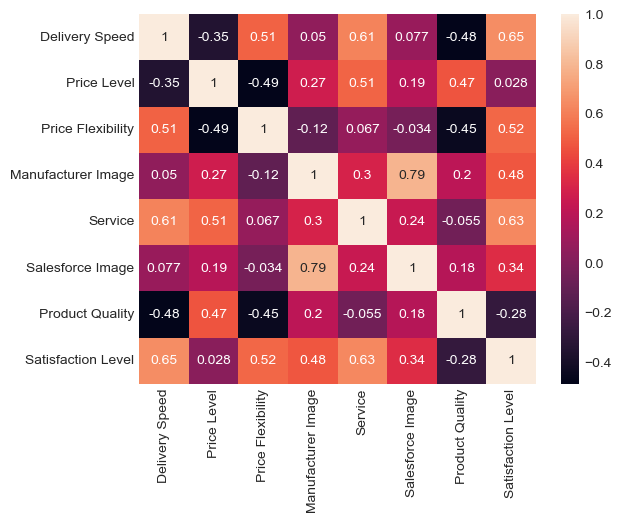

In [24]:
### Heatmap from the Seaborn library provides colored correlation coefficients.

### The parameter annot = True shows not only colors but also numerical values.

sns.heatmap(correlations, annot=True)

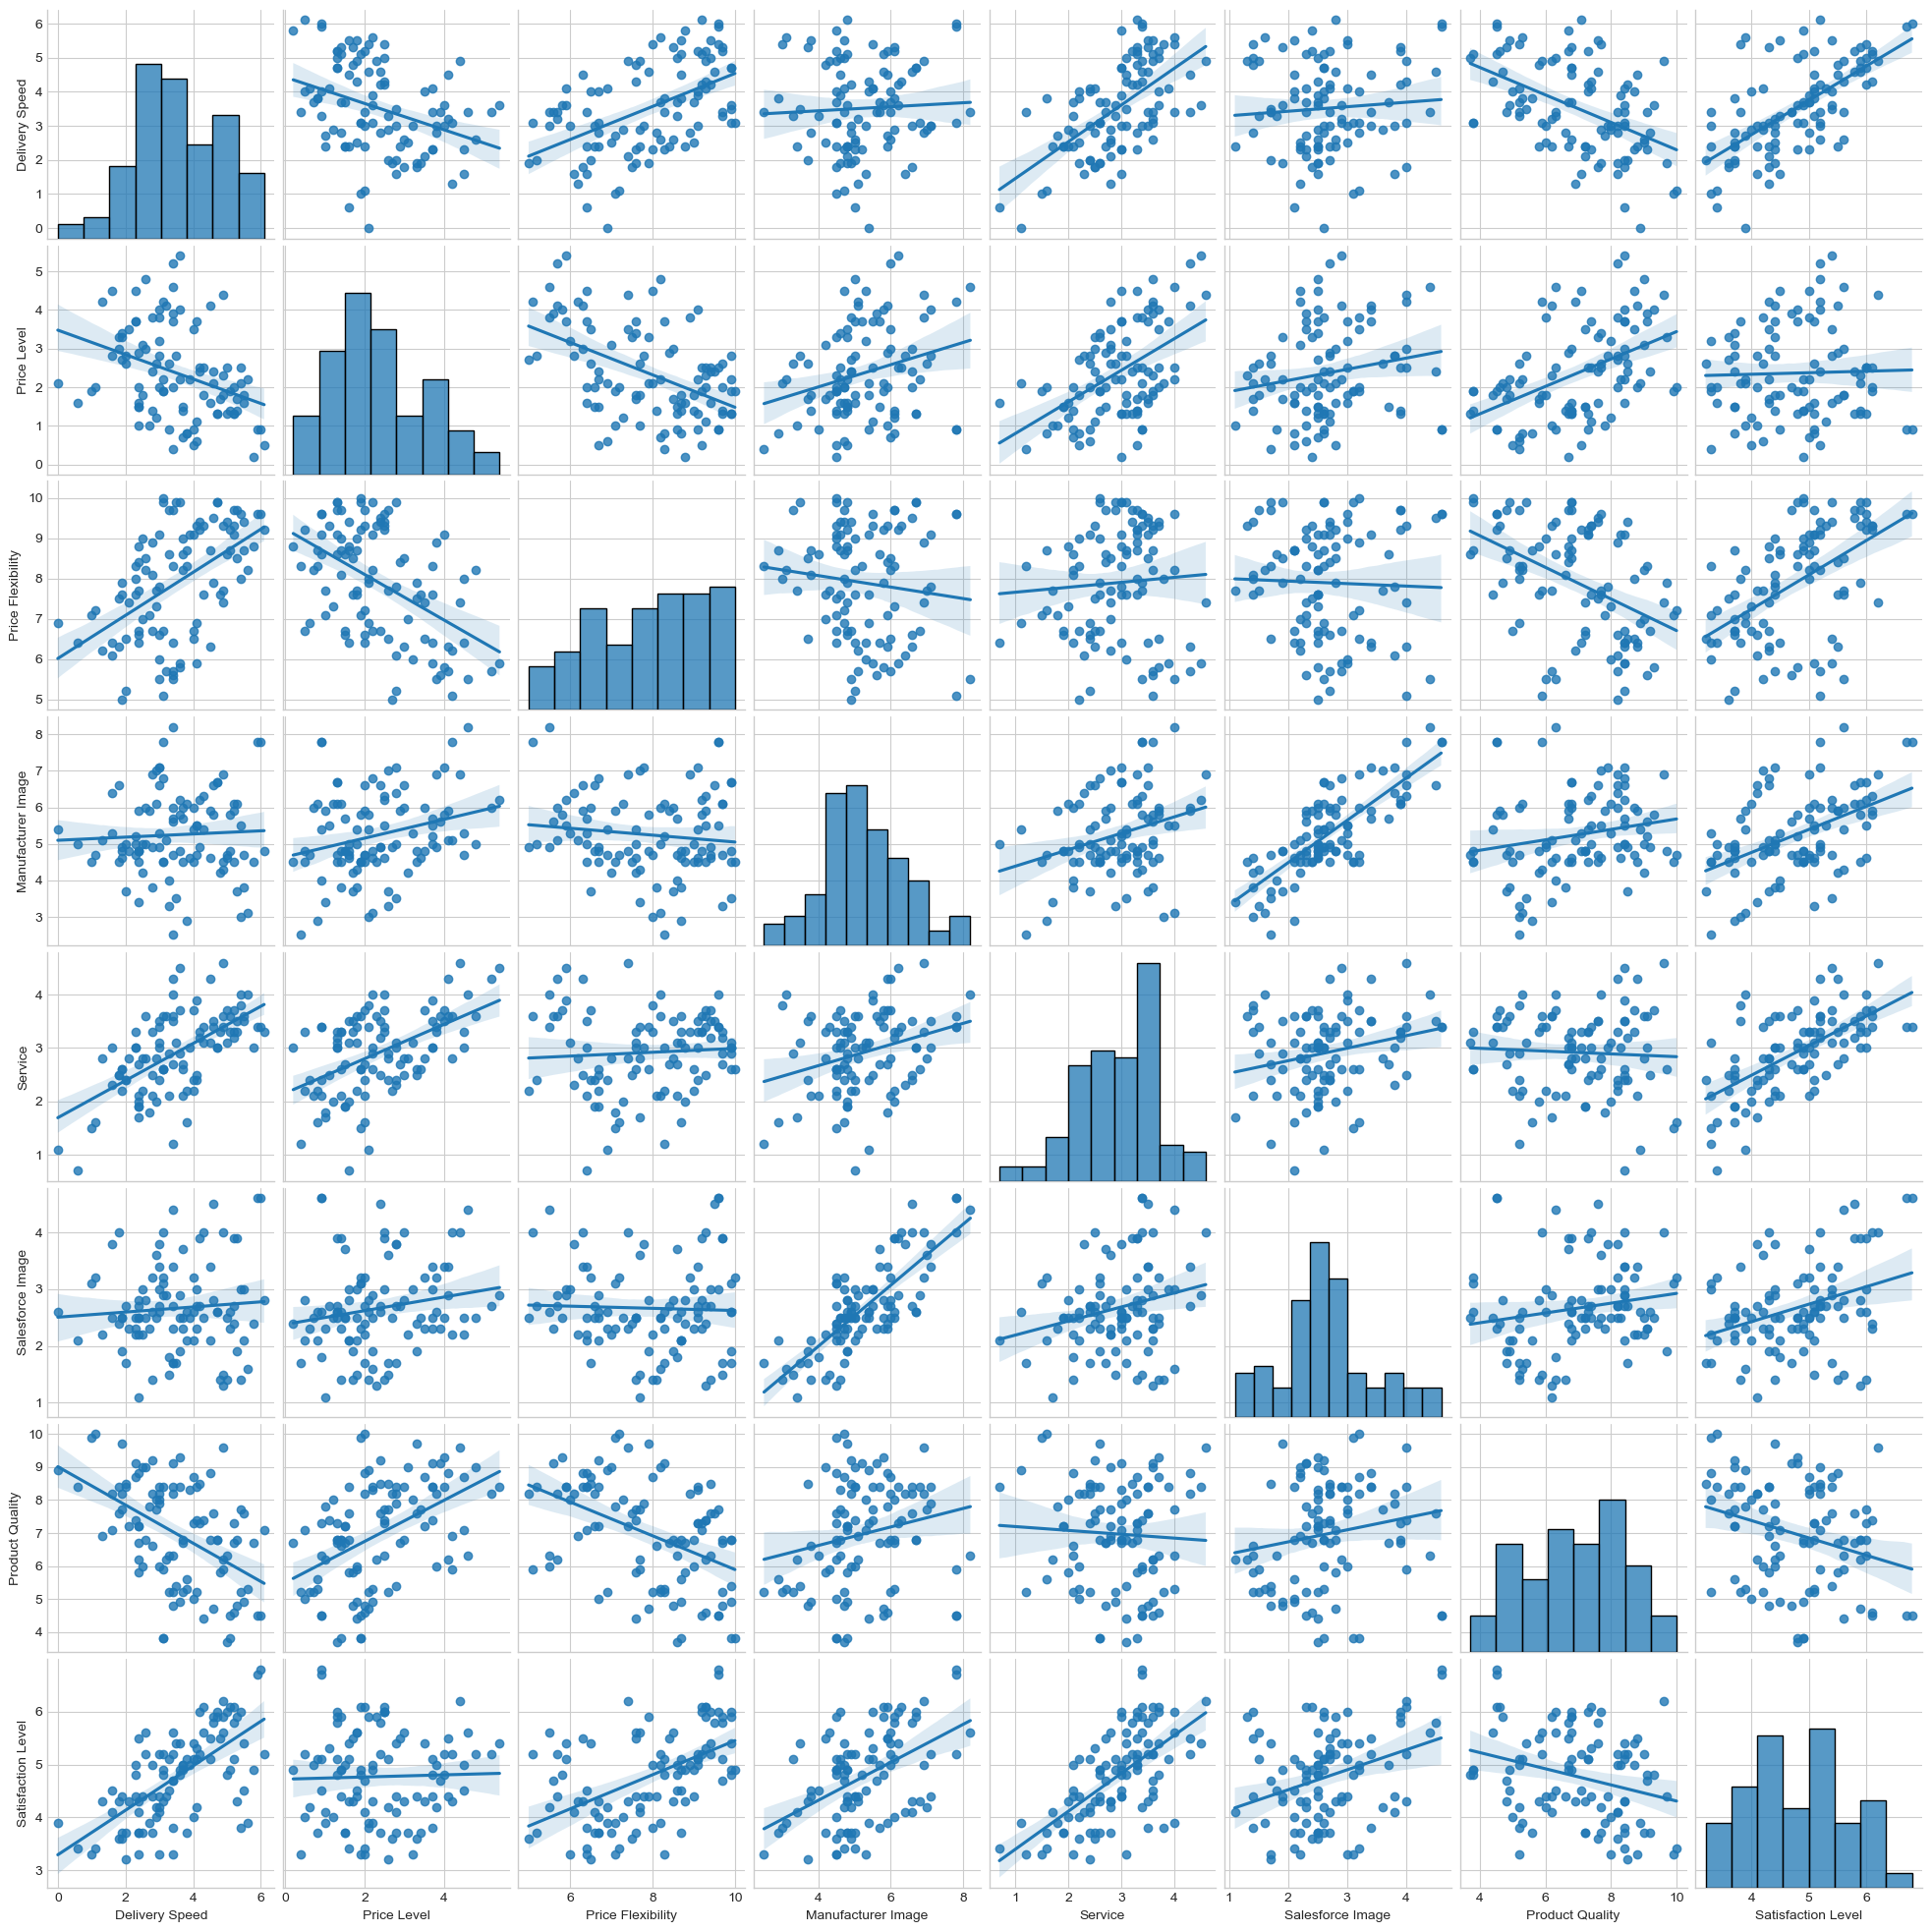

In [25]:
### Scatter charts of mental variables (this takes a while to print)

sns.pairplot(hatco1, kind='reg')

<AxesSubplot:xlabel='Delivery Speed', ylabel='Satisfaction Level'>

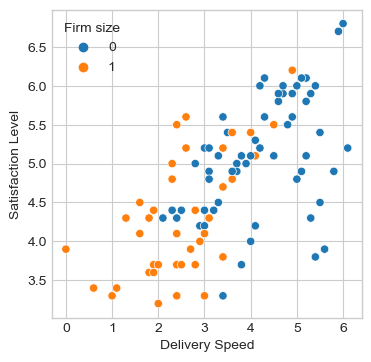

In [26]:
### Single scatter chart (small firms in blue, big ones in orange)

plt.figure(figsize=(4, 4))

sns.scatterplot(x = 'Delivery Speed', y = 'Satisfaction Level', hue = 'Firm size', data = hatco)

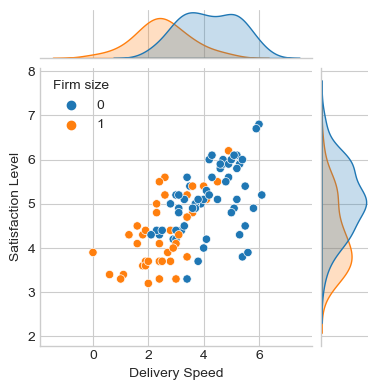

In [27]:
### jointplot also includes "edge distributions"

sns.jointplot(x = 'Delivery Speed', y = 'Satisfaction Level', hue = 'Firm size', data = hatco, height = 4)

A chart of multiple scatter charts can be constructed using the __relplot__ function.

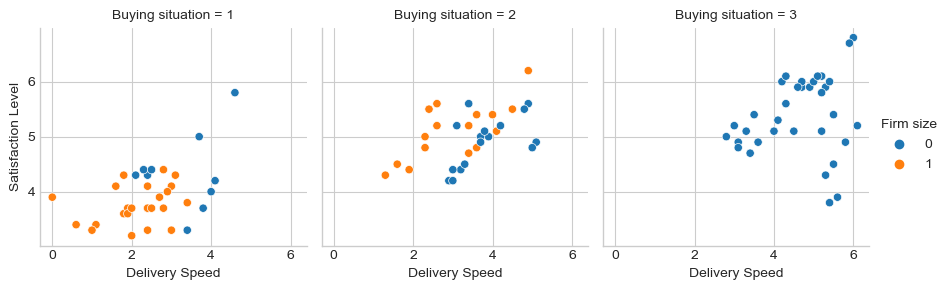

In [28]:
sns.relplot(x = 'Delivery Speed', y = 'Satisfaction Level', col = 'Buying situation', hue = 'Firm size', 
            data = hatco, kind = 'scatter', height = 3, aspect = 1)

### Correlation coefficient testing

Wikipedia: Pearson correlation coefficient: https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

SciPy documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html

In [29]:
### Correlation coefficients and p-values of mental image variables with 'Satisfaction Level'

for var in hatco1:
    hatco1_dropna = hatco1.dropna(subset=[var, 'Satisfaction Level'])
    print(var, pearsonr(hatco1_dropna["Satisfaction Level"], hatco1_dropna[var]))

Delivery Speed PearsonRResult(statistic=0.6506323301389191, pvalue=2.354357209803324e-13)
Price Level PearsonRResult(statistic=0.028394665880510234, pvalue=0.7791450989655391)
Price Flexibility PearsonRResult(statistic=0.5248141510750397, pvalue=2.0815396346392862e-08)
Manufacturer Image PearsonRResult(statistic=0.4759338314260012, pvalue=5.599028749180165e-07)
Service PearsonRResult(statistic=0.631232901641948, pvalue=1.917952074232071e-12)
Salesforce Image PearsonRResult(statistic=0.3409093027606839, pvalue=0.0005188847493396814)
Product Quality PearsonRResult(statistic=-0.28333980318451, pvalue=0.004282584841192087)
Satisfaction Level PearsonRResult(statistic=1.0, pvalue=0.0)


The correlations with the Satisfaction Level variable are significant (less than 0.05) except for the Price Level variable.

Source and origin of inspiration:<br /> 
Aki Taanila: Data-analytiikka Pythonilla: <a href="https://tilastoapu.wordpress.com/python/">https://tilastoapu.wordpress.com/python/</a>